In [ ]:
# Source: https://chat.openai.com/c/92c0eab9-3bcc-4ef4-8b65-e99384b56291
# Using Gaussian HMM create a python program to detect momentum and regime changes in the 
# weekly prices of the s&p 500

# To detect momentum and regime changes in the weekly prices of the 
# S&P 500 using a Gaussian Hidden Markov Model (HMM), you'll need 
# to utilize the hmmlearn library. 
# Make sure to install it first using pip install hmmlearn. Here's an example program:

#!pip install numpy pandas matplotlib hmmlearn pandas_datareader yfinance

In [5]:
%matplotlib inline

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

# Download S&P 500 weekly data
symbol = "^GSPC"
start_date = "2000-01-01"
end_date = "2023-04-30"

#interval="1wk"
prices_raw = pdr.get_data_yahoo(symbol, start=start_date, end=end_date, interval="1d")

[*********************100%***********************]  1 of 1 completed


In [36]:
prices_raw

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...
2023-04-24,4132.069824,4142.410156,4117.770020,4137.040039,4137.040039,3290940000
2023-04-25,4126.430176,4126.430176,4071.379883,4071.629883,4071.629883,3978640000
2023-04-26,4087.780029,4089.669922,4049.350098,4055.989990,4055.989990,3837030000


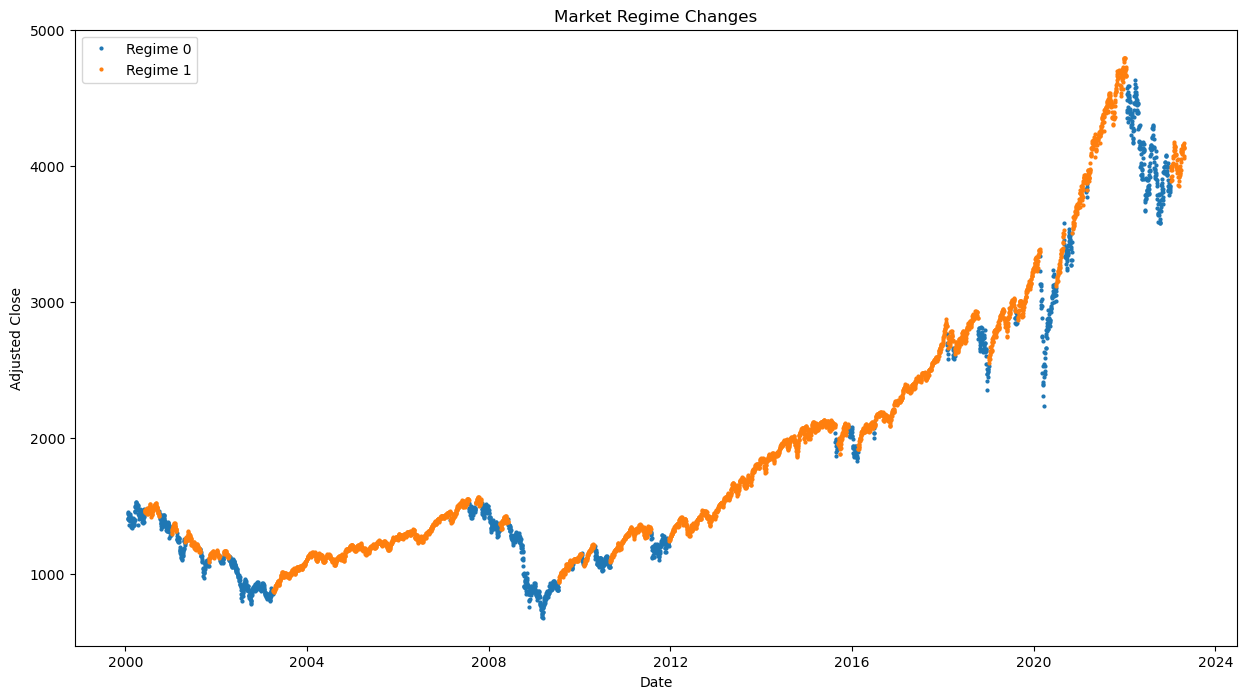

In [59]:
num_iterations = 10**3
num_states = 2
num_components = 2

def get_price_data(start_date, end_date):
    prices = prices_raw
    #prices = pdr.get_data_yahoo(symbol, start=start_date, end=end_date, interval="1d")
    return prices

def preprocess_data(df):
    df['log_return'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))
    df.dropna(inplace=True)
    return df

def fit_hmm_model(data, n_states, n_iter):
    model = hmm.GaussianHMM(n_components=num_components, covariance_type='diag', n_iter=num_iterations)
    model.fit(data.reshape(-1, 1))
    return model

def detect_market_regime_changes(start_date, end_date, n_states=num_states, n_iter=num_iterations):
    prices = get_price_data(start_date, end_date)
    prices_preprocessed = preprocess_data(prices)
    log_returns = prices_preprocessed['log_return'].values

    model = fit_hmm_model(log_returns, n_states, n_iter)
    hidden_states = model.predict(log_returns.reshape(-1, 1))    
    
    fig, ax = plt.subplots(figsize=(15, 8))
    for i in range(n_states):
        idx = (hidden_states == i)
        ax.plot(prices_preprocessed.index[idx], prices['Adj Close'][idx], 'o', label=f'Regime {i}', markersize=2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Adjusted Close')
    ax.set_title('Market Regime Changes')
    ax.legend()
    plt.show()



detect_market_regime_changes(start_date, end_date)    
    